## Logistic regression with theano

The 8th KIAS CAC Summer School 

Machine Learning Practice I - Logistic Regression example

Author: Yung-Kyun Noh, Ph.D.

<a href="http://deeplearning.net/software/theano/tutorial/">Theano tutorial</a>

<a href="http://deeplearning.net/software/theano/tutorial/examples.html">Logistic regression in Theano tutorial</a>

Many parts are borrowed from Jiseob Kim's <a href="http://nzer0.github.io/2015/05/12/Theano-Shared.html">Github</a>.


In [1]:
import theano
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt


%pylab inline
floatX = theano.config.floatX

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)


Populating the interactive namespace from numpy and matplotlib


### Data preparation

We use a two-class synthetic dataset from two different Gaussian density functions.
\begin{eqnarray}
p(\mathbf{x}|\mu_c, \Sigma_c) = \frac{1}{\sqrt{2\pi}|\Sigma_c|^\frac{1}{2}} \exp\left(-\frac{1}{2}(\mathbf{x} - \mu_c)^\top\Sigma_c^{-1}(\mathbf{x} - \mu_c)\right)   \quad \text{for class} \quad c = \{1,2\}
\end{eqnarray}

The first class uses $\mu_1 = \left(\begin{array}{c}
4 \\
0
\end{array}\right)$, $\Sigma_1 = \left(\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}\right)$, and the second class uses $\mu_2 = \left(\begin{array}{c}
0 \\
4
\end{array}\right)$, $\Sigma_2 = \left(\begin{array}{cc}
1 & 0 \\
0 & 1
\end{array}\right)$.

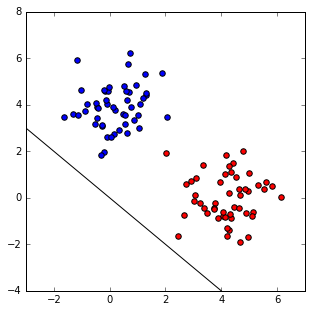

In [2]:
n_data = 50
data1 = np.random.multivariate_normal([4,0], [[1,0],[0,1]], n_data)
#print data1
data2 = np.random.multivariate_normal([0,4], [[1,0],[0,1]], n_data)
data_x = np.vstack([data1,data2])
data_y = np.hstack([np.ones((n_data,)), -np.ones((n_data,))])
shared_x = theano.shared(np.asarray(data_x, dtype=floatX), name='data_x')
shared_y = theano.shared(np.asarray(data_y, dtype=floatX), name='data_y')

w = theano.shared(np.ones((2,1), dtype=floatX), name='w')
b = theano.shared(np.zeros((1,), dtype=floatX), name='b')

def draw_state():
    plt.rcParams['figure.figsize']=(5,5)
    plt.scatter(data1[:,0],data1[:,1],30,'r')
    plt.scatter(data2[:,0],data2[:,1],30,'b')
    [x1min,x1max,x2min,x2max] = plt.axis()
    x1val = np.arange(x1min,x1max,0.1)
    wval = w.get_value(borrow=True)
    bval = b.get_value(borrow=True)
    plt.plot(x1val, -(wval[0]*x1val+bval)/wval[1], 'k')
    plt.axis([x1min,x1max,x2min,x2max])
    plt.show()
    
draw_state()

## Logistic regression


\begin{eqnarray}
P(y = 1|\mathbf{x};\mathbf{w},b) &=& \frac{1}{1 + \exp(-(\mathbf{w}^\top\mathbf{x} + b))} \\
P(y = -1|\mathbf{x};\mathbf{w},b) &=& \frac{1}{1 + \exp(\mathbf{w}^\top\mathbf{x} + b)}
\end{eqnarray}
The objective function $L$ with $\mathcal{D}=\{\mathbf{x}_i,y_i\}_{i = 1}^N$
\begin{eqnarray}
L = -\log P(y_1,\ldots,y_N|\mathbf{x}_1,\ldots,\mathbf{x}_N; \mathbf{w}, b) + \lambda ||\mathbf{w}||^2 \quad 
\left( P(y_1,\ldots,y_N|\mathbf{x}_1,\ldots,\mathbf{x}_N; \mathbf{w}, b) = \prod_{i = 1}^N P(y = y_i|\mathbf{x} = \mathbf{x}_i; \mathbf{w}, b) \right)
\end{eqnarray}


In [3]:
x = T.matrix('x')
y = T.vector('y')
p_y = 1/(1+T.exp(-(T.dot(x, w)+b)*T.reshape(y,(-1,1))))
loss = T.mean(-T.log(p_y)) + 0.01*w.norm(2)

## Gradient Descent

In [4]:
wgrad = T.grad(loss, w)
bgrad = T.grad(loss, b)
lr = 0.1

#train = theano.function([], loss, givens=[(x,shared_x), (y,shared_y)], updates=[(w,w-lr*wgrad), (b,b-lr*bgrad)])
train = theano.function([x,y], loss, updates=[(w,w-lr*wgrad), (b,b-lr*bgrad)], allow_input_downcast=True)

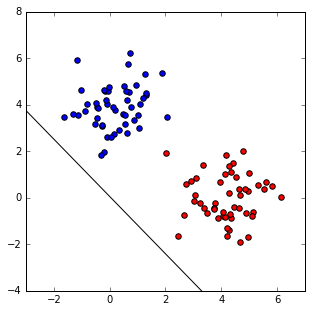

loss: 2.10233020782, w norm: 1.28088128567


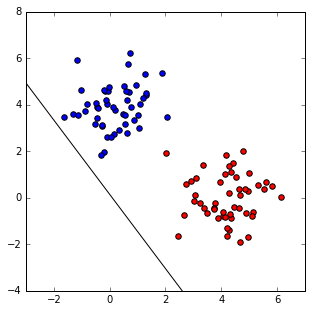

loss: 1.71255123615, w norm: 1.16632390022


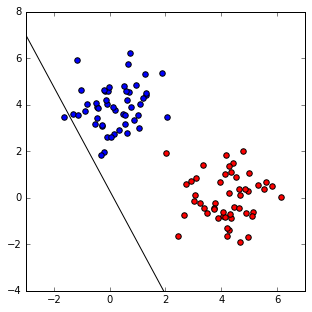

loss: 1.34646475315, w norm: 1.07538235188


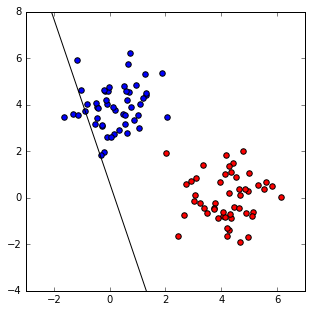

loss: 1.01946818829, w norm: 1.01123631001


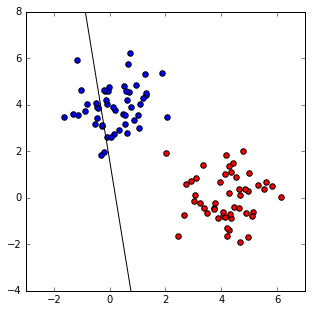

loss: 0.748840808868, w norm: 0.973073840141


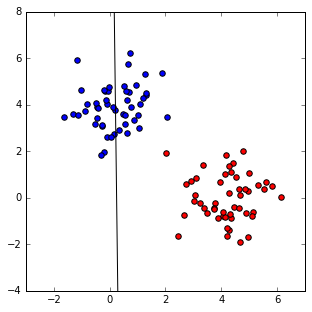

loss: 0.544748008251, w norm: 0.955806195736


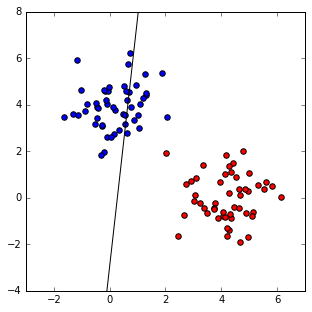

loss: 0.403063088655, w norm: 0.952658057213


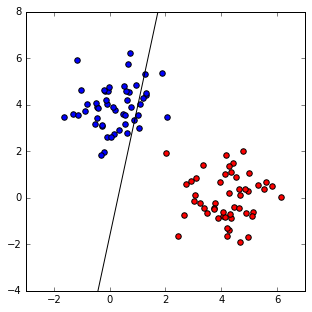

loss: 0.309262931347, w norm: 0.957877159119


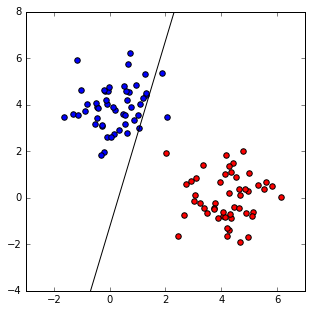

loss: 0.247579291463, w norm: 0.967653274536


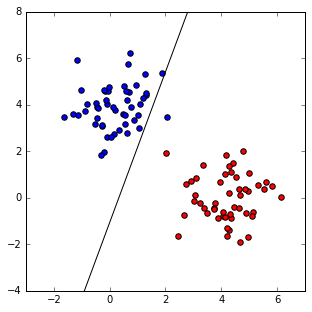

loss: 0.206120118499, w norm: 0.979770481586


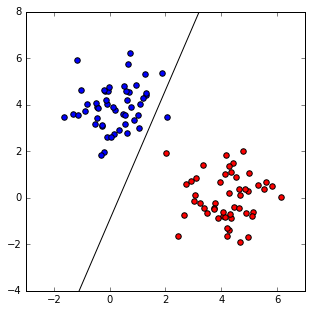

loss: 0.17728304863, w norm: 0.993004798889


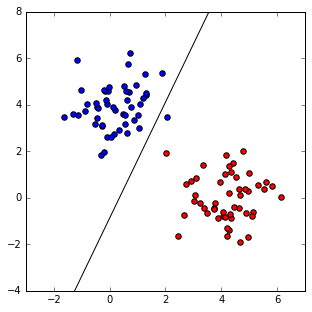

loss: 0.156485691667, w norm: 1.00668680668


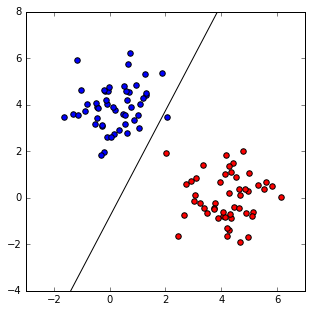

loss: 0.140974149108, w norm: 1.02044928074


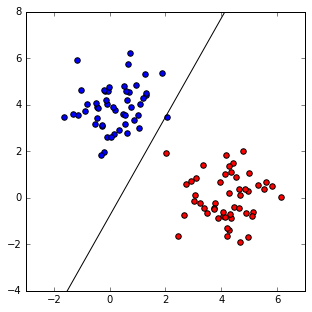

loss: 0.129056870937, w norm: 1.03408968449


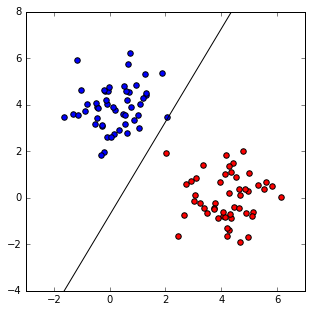

loss: 0.119662880898, w norm: 1.04749763012


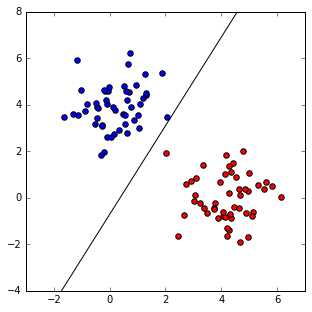

loss: 0.112091936171, w norm: 1.0606149435


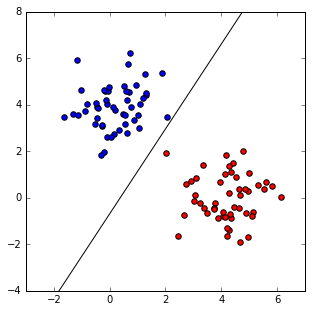

loss: 0.105872198939, w norm: 1.07341349125


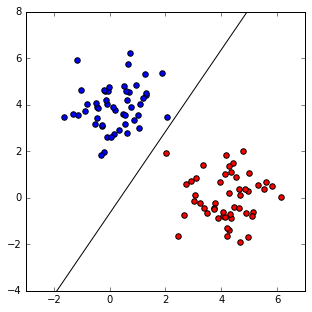

loss: 0.100676722825, w norm: 1.08588266373


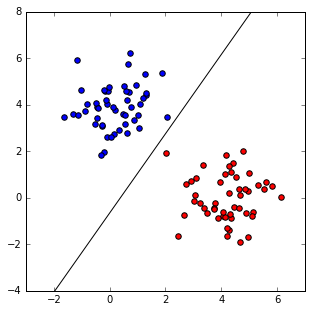

loss: 0.0962731838226, w norm: 1.09802258015


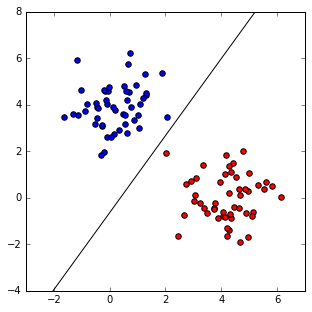

loss: 0.0924928486347, w norm: 1.10983908176


1.5807499999999999

In [5]:
import time
tic = time.clock()

for epoch in xrange(20):
#    loss_val = train()
    loss_val = train(data_x, data_y)
    draw_state()
    print('loss: {}, w norm: {}'.format(loss_val, np.sqrt(np.sum(w.get_value()**2))))

toc = time.clock()
toc - tic
